# Value at Risk Assessment Model

### Import Packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Distributions - Set Up Stock Parameters

In [2]:
# Number of shares
shares_MSFT = 1000


# Live stock price
price = yf.Ticker('MSFT')
price_MSFT = price.history().tail(1)['Close'].iloc[0]
print("MSFT")
print("--------")
print(price.history().tail(1)['Close'].iloc[0])


MSFT
--------
239.82000732421875


30-day Historical volatility source: https://www.alphaquery.com/stock/MSFT/volatility-option-statistics/30-day/historical-volatility

In [3]:
# Investment value
value_MSFT = price_MSFT * shares_MSFT

# Risk free rate (4-week treasury bill rate)
rfr_MSFT = 0.02

# Volatility (30-day volatility at that time)
vol_MSFT = 0.2599

### Simulations - Calculate Investment Returns

In [4]:
# Number of simulations
simulations = 50000

# Investment time in a year
t_MSFT = 21/252

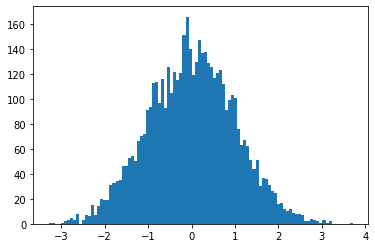

In [10]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample, bins = 100);

In [13]:
# Create a function to calculate the returns of the investment
print(np.mean(sample))
print(np.std(sample))

# Apply the VaR function to simulate the returns
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - 0.5 * vol ** 2) * t + np.random.standard_normal(simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

0.007454610479452542
0.9968456189379145


### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [14]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.
x = 0.9
y = 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x, y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-22,344
VaR at 95% confidence level: $-28,234
VaR at 99% confidence level: $-38,988


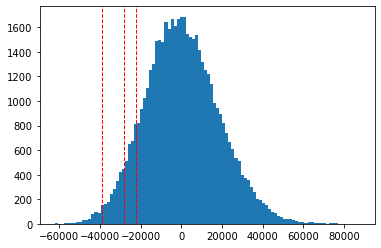

In [16]:
# Plot the returns
plt.hist(returns_MSFT, bins = 100);



# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10, 5, 1]
for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_MSFT, i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)

